In [1]:
import pandas as pd
glass = pd.read_csv('glass.csv', index_col='id')
glass.info()
glass.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ri          214 non-null    float64
 1   na          214 non-null    float64
 2   mg          214 non-null    float64
 3   al          214 non-null    float64
 4   si          214 non-null    float64
 5   k           214 non-null    float64
 6   ca          214 non-null    float64
 7   ba          214 non-null    float64
 8   fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass['window_glass']=glass['glass_type'].replace({1:1,2:1,3:1,5:0,6:0,7:0})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,window_glass
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


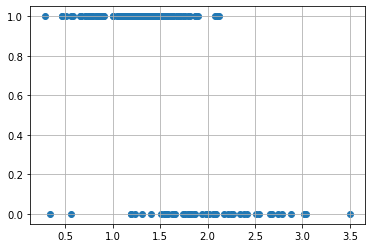

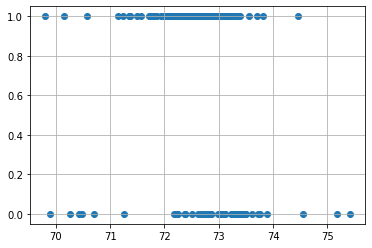

In [4]:
from matplotlib import pyplot as plt
plt.scatter(glass.al,glass.window_glass)
plt.grid()
plt.show()
plt.scatter(glass.si,glass.window_glass)
plt.grid()

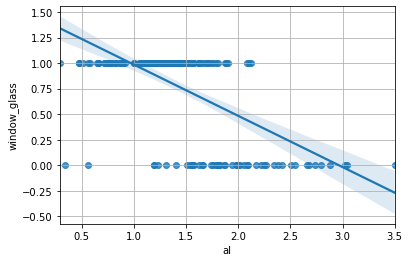

In [5]:
import seaborn as sns
sns.regplot('al','window_glass',glass)
plt.grid()
plt.show()

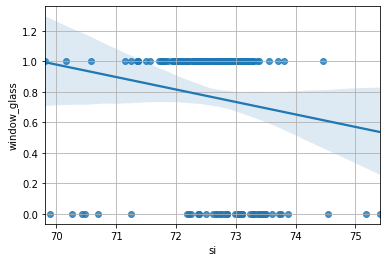

In [6]:
sns.regplot('si','window_glass',glass)
plt.grid()


In [7]:
from statsmodels.formula.api import ols
#calcoliamo il regressore lineare
model = ols('window_glass ~ al',glass).fit()
#otteniamo le predizioni
predictions = model.predict(glass)
#arrotondiamo le predizioni al valore più vicino
#ciò corrisponde a sogliare con 0.5
predictions = predictions.round()
#i valori predetti sono adesso binari
predictions.unique()

array([1., 0.])

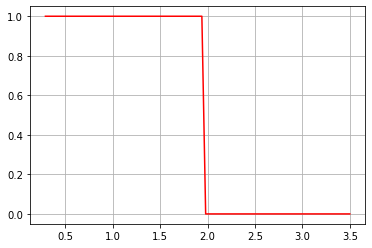

In [8]:
import numpy as np
#ordiniamo i valori di al in ordine crescente
#prima troviamo gli indici che ordinano l'array
idx=np.argsort(glass['al'])
#poi applichiamo lo stesso ordinamento sia ad al che alle predizioni
al = glass['al'].values[idx]
pred = predictions.values[idx]

#infine plottiamo
#sns.regplot('al','window_glass',glass)
plt.plot(al,pred,'r')
plt.grid()
plt.show()

In [9]:
from statsmodels.formula.api import logit

model = logit('window_glass ~ al', glass).fit()

Optimization terminated successfully.
         Current function value: 0.354364
         Iterations 7


In [10]:
probs = model.predict(glass)
probs.head()

id
1    0.957513
2    0.883730
3    0.781728
4    0.910590
5    0.926211
dtype: float64

In [11]:
probs.min(), probs.max()

(0.0009889852519933465, 0.9985007304335234)

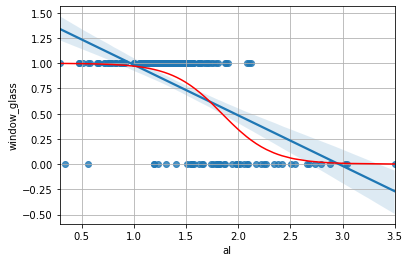

In [14]:
#riordiniamo le probabilità utilizzando 
#gli indici trovati prima
p = probs.values[idx]

sns.regplot('al','window_glass',glass)
plt.plot(al,p,'r')
plt.grid()
plt.show()

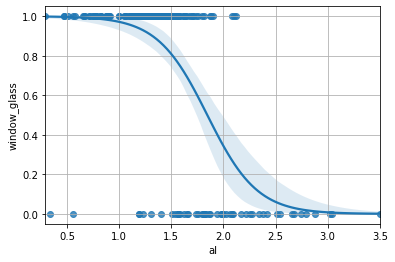

In [15]:
sns.regplot(glass['al'],glass['window_glass'],logistic=True)
plt.grid()
plt.show()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           window_glass   No. Observations:                  214
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Mar 2021   Pseudo R-squ.:                  0.3547
Time:                        19:47:13   Log-Likelihood:                -75.834
converged:                       True   LL-Null:                       -117.51
Covariance Type:            nonrobust   LLR p-value:                 6.835e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7136      1.078      7.158      0.000       5.602       9.826
al            -4.1804      0.660     -6.338      0.000      -5.473      -2.888
==============================================================================
"""

In [17]:
biopsy.data['class'].unique()

NameError: name 'biopsy' is not defined